### US Economy Prediction 2001 - ANP Model

In [1]:
# import AhpAnpLib libraries
from AhpAnpLib import inputs_AHPLib as input
from AhpAnpLib import structs_AHPLib as str
from AhpAnpLib import calcs_AHPLib as calc

#### 1. Initialize model

In [2]:
# initialize model
# We use Model() to create a model and name the model as "US Economy Prediction 2001"
# the name of the model is not required
economy2001 = str.Model("US Economy Prediction 2001")

#### 2. Strcture of model

There are five clusters in the model: Primary Factors, Aggregate Demand Factors, Aggregate Supply Factors, Geopolitical Contexts and Alternatives.

In [3]:
# create clusters using Cluster()
# there are two parameters: clustername and order, both are required
primary = str.Cluster("1 Primary Factors",0)
demand = str.Cluster("2 Aggregate Demand Factors",1)
supply = str.Cluster("3 Aggregate Supply Factors", 2)
geopolitical = str.Cluster("4 Geopolitical Contexts", 3)
alternatives = str.Cluster("4Alternatives",4)

There are three primary factors: Aggregate Demand, Aggregate Supply and Geopolitical Contexts. So use Node() to create the three primary factors as nodes and then add the nodes to the cluster of Primary Factors using addMultipleNodes2Cluster command. <br/>
There are two parameters provided when creating the nodes: node name and display order. Both parameters are required.

In [4]:
# primary nodes
demandN = str.Node("1 Aggregate Demand",1)
supplyN = str.Node("2 Aggregate Supply", 2)
geopoliticalN = str.Node("3 Geopolitical Contexts", 3)
primary.addMultipleNodes2Cluster(demandN,supplyN,geopoliticalN)

There are seven Aggregate Demand factors: Consumption, Exports, Investment,Confidence, Fiscal Policy, Monetary Policy and Expectations will influence the economy recovery. We create the nodes and then add them to the "Aggregate Demand Factors" cluster.

In [5]:
# demand nodes
consumption = str.Node("1 Consumption",1)
exports = str.Node("2 Exports",2)
investment = str.Node("3 Investment",3)
confidence = str.Node("4 Confidence",4 )
fiscalp = str.Node("5 Fiscal Policy",5)
monetaryp = str.Node("6 Monetary Policy",6)
expectations = str.Node("7 Expectations", 7)
demand.addMultipleNodes2Cluster(consumption,exports,investment,confidence, fiscalp, monetaryp,expectations)

In [6]:
# supply factor nodes
labor = str.Node("1 Labor Costs",1)
natural = str.Node("2 Natural Resources Costs",2)
expectations = str.Node("3 Expectations",3)
supply.addMultipleNodes2Cluster(labor,natural,expectations)

# geopolitical contexts nodes
political = str.Node("1 Major International Political Relationships",1)
ecomonic = str.Node("2 Major International Economic Relationships",2)
geopolitical.addMultipleNodes2Cluster(political,ecomonic)

We predict: how long the economy will recover? in three months, in six month, in twelve month or in twenty four month. These are alternatives of our model. <br/>

We create the alternatives nodes below and add the to the Alternatives cluster.

In [7]:
# alternatives
threeM = str.Node("1 Three months",1)
sixM = str.Node("2 Six months",2)
twelveM = str.Node("3 Twelve months",3)
twentyFourM = str.Node("4 Twenty four months",4)
alternatives.addMultipleNodes2Cluster(threeM,sixM,twelveM,twentyFourM)

We now add all the clusters to the model using addMultipleClusters2Model method.

In [8]:
# add all clusters in the model
economy2001.addMultipleClusters2Model(primary,demand,supply,geopolitical,alternatives)

Next, we add connections from primary factors nodes to all nodes in corresponding subfactors cluster. And we connect all subfactors to the alternatives. In this ANP model, there is feedback from alternatives to all factors. We add connections from all alternatives to all primary factors. 

In [9]:
# add connections
economy2001.addNodeConnectionFromNodeToAllNodesOfCluster("1 Aggregate Demand","2 Aggregate Demand Factors")
economy2001.addNodeConnectionFromNodeToAllNodesOfCluster("2 Aggregate Supply","3 Aggregate Supply Factors")
economy2001.addNodeConnectionFromNodeToAllNodesOfCluster("3 Geopolitical Contexts","4 Geopolitical Contexts")
economy2001.addNodeConnectionFromAllNodesToAllNodesOfCluster("2 Aggregate Demand Factors","4Alternatives")
economy2001.addNodeConnectionFromAllNodesToAllNodesOfCluster("3 Aggregate Supply Factors","4Alternatives")
economy2001.addNodeConnectionFromAllNodesToAllNodesOfCluster("4 Geopolitical Contexts","4Alternatives")

economy2001.addNodeConnectionFromAllNodesToAllNodesOfCluster("4Alternatives","1 Primary Factors")


#### 3. Visualize the model

_________________________MODEL STRUCTURE_________________________
Name: US Economy Prediction 2001
Type: pairwise

____________________________NODES_______________________________
1 Aggregate Demand order: 1
2 Aggregate Supply order: 2
3 Geopolitical Contexts order: 3
1 Consumption order: 1
2 Exports order: 2
3 Investment order: 3
4 Confidence order: 4
5 Fiscal Policy order: 5
6 Monetary Policy order: 6
7 Expectations order: 7
1 Labor Costs order: 1
2 Natural Resources Costs order: 2
3 Expectations order: 3
1 Major International Political Relationships order: 1
2 Major International Economic Relationships order: 2
1 Three months order: 1
2 Six months order: 2
3 Twelve months order: 3
4 Twenty four months order: 4
____________________________CLUSTERS____________________________
1 Primary Factors order: 0
2 Aggregate Demand Factors order: 1
3 Aggregate Supply Factors order: 2
4 Geopolitical Contexts order: 3
4Alternatives order: 4
_________________________NODE CONNECTIONS________________

Cluster from 1 Primary Factors connected to: [2 Aggregate Demand Factors order: 1, 3 Aggregate Supply Factors order: 2, 4 Geopolitical Contexts order: 3]
Cluster from 2 Aggregate Demand Factors connected to: [4Alternatives order: 4]
Cluster from 3 Aggregate Supply Factors connected to: [4Alternatives order: 4]
Cluster from 4 Geopolitical Contexts connected to: [4Alternatives order: 4]
Cluster from 4Alternatives connected to: [1 Primary Factors order: 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


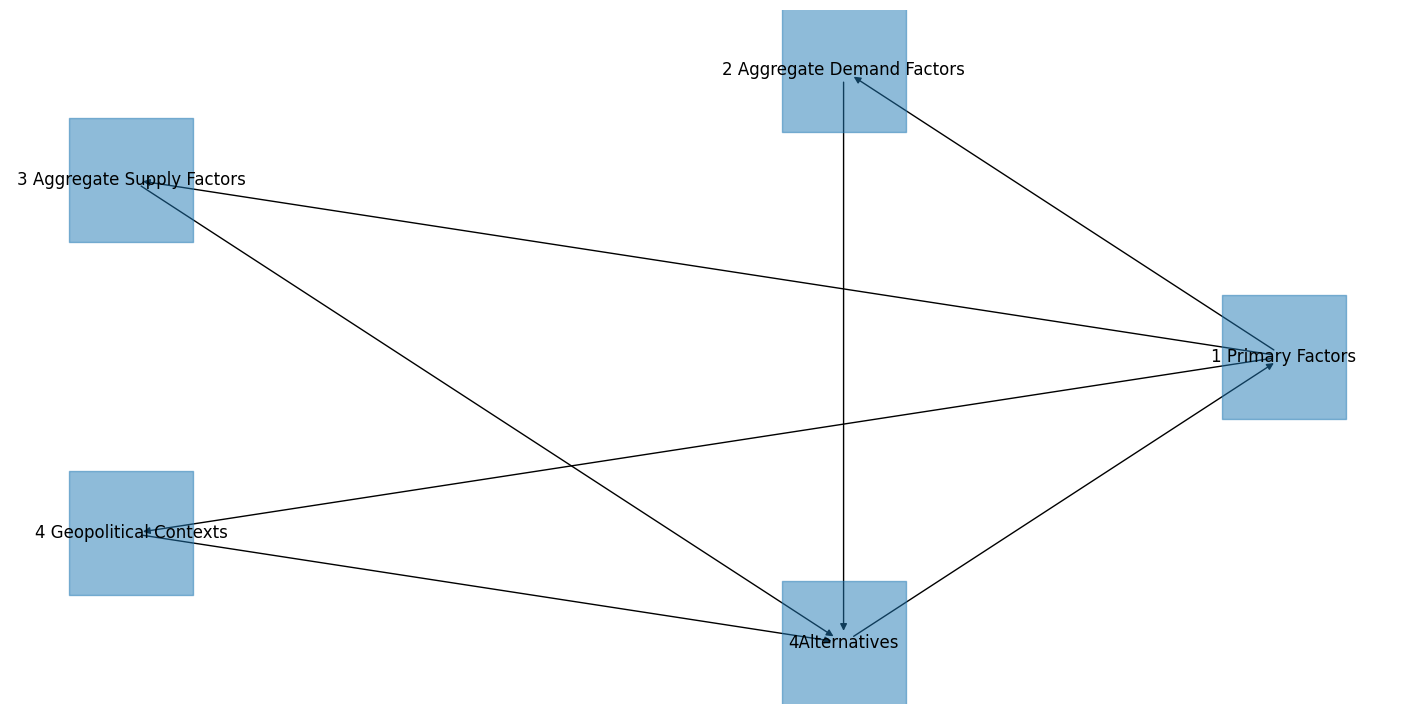

In [10]:
#visualize the model
economy2001.printStruct()
economy2001.drawGraphModel()
economy2001.drawGraphClusters()

#### 4. Export questionnaire

In [11]:
#export questionnaire
input.export4ExcelQuestFull(economy2001,"USEconomy_Excel_Full_empty.xlsx")


In [12]:
input.genexport4QualtricsFirstLineAboveDiagQuest("USEconomy_Qualtrics_FirstlineAbove.txt",economy2001,"dominate")

In [13]:
input.genexport4QualtricsQuestFull("USEconomy_Qualtrics_Full.txt",economy2001,"dominate")

In [14]:
input.genexport4GoogleFirstLineQuest("USEconomy_Qualtrics_Firstline.txt",economy2001,"dominate")